Buildng and Training Neural Networks on MNIST

# 1. Build a Logistic Regression Model
The most important part of the neural network is torch.nn - python neural network library.

This library allows us to build neural networks by concatenating different types of layers.

In [ ]:
import torch
import torch.nn as nn

def model(input_size, num_classes):
    return nn.Linear(input_size, num_classes)

Define a function named model, which returns a linear model (xW^{T}+b) by nn.Linear(input_size, num_classes)

    input_size is the size of the row vector x

    num_classes is the number of classes to be classified

    This model includes parameters W and b.

In MNIST, the size of all the images is 1*28*28, which can be re-arranged to a row vector x with size 784 so that input_size=784

    num_classes=10 in MNIST, since there are 10 possible types of digits (from 0 to 9)

    Therefore, the size of W is 10*784 and the size of b is 1*10 

In summary, Linear model: xW^{T}+b

    The size of W is num_classes*input_size

    The size of b is 1*num_classes

    The size of input x is 1*input_size (if batch_size=1)

# 2. Load a Dataset
The MNIST database of handwritten digits has a trainig dataset of 60,000 examples and a test dataset of 10,000 examples.

The digits in this database are centered in a fixed-size image (1*28*28)

tensor([3, 4])
torch.Size([2, 1, 28, 28])
torch.Size([28, 28])


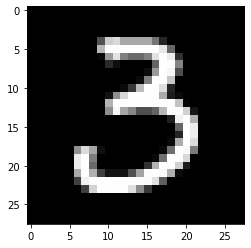

The label of the given image is tensor([3, 4])


In [4]:
import torch
import torchvision
import matplotlib.pyplot as plt

# transforms images to a pytorch tensor
MNIST_transform = torchvision.transforms.ToTensor()

# load the set of training images
trainset = torchvision.datasets.MNIST(root = './data', train = True, download = True, transform = MNIST_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 2, shuffle = True)

# load the set of test images
testset = torchvision.datasets.MNIST(root = './data', train = False, download = True, transform = MNIST_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 1, shuffle = False)

# Plot some of images of digits
def plot_images(images):
    images_for_plot = images[0,0,:,:] # extract the 28*28 tensor from the tensor (image size)
    print(images_for_plot.size())
    plt.imshow(images_for_plot, cmap='gray')  # plot the image with colormaps='gray'
    plt.show()

for i, (images, labels) in enumerate(trainloader): # ith batch of images and labels
    print(images.size())  # [batch_size, channel_size, image_size_x, image_size_y]
    plot_images(images)
    print('The label of the given image is',labels) 
    break  #force to stop the for loop

# 3. Train the Logistic Regression Model and Test the Training/Test Accuracy
Using the model provided above, and using the loss function, which is definied by
$$L(\theta) :=\frac{1}{N} \sum_{j=1}^N\ell(y_j, h(x_j; \theta)).$$
Here,N represents the size of dataset given, and $\ell(y_j,h(x_j; \theta))$ is the  general distance between real label and predicted label.

 $h(x_j; \theta)$ is a probability distribution of data $x$.
 
 
 We are also able to find the training/test accuracy by dividing number of correct classification in a dataset by the total number of data in dataset.
 
 i.e., accuracy $ = \frac{\text{The number of correct classifications in a dataset}}{\text{the total number of data in a dataset}}$

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt

# model
def model(input_size, num_Classes):
    return nn.Linear(input_size, num_classes)

#initialize
input_size = 784 # 1*28*28
num_classes = 10 #mnist nums

my_model = model(input_size, num_classes)

# Cross Entropy loss
criterion = nn.CrossEntropyLoss()

# Training algorithm
    # Using Stochastic gradient descent method
    # Step size of 0.1
optimizer = optim.SGD(my_model.parameters(), lr = 0.2)

# Dataset Loading
MNIST_transform = torchvision.transforms.ToTensor()

# Training
    # Can change batch_size
trainset = torchvision.datasets.MNIST(root = './data', train = True, download = True, transform = MNIST_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 30, shuffle = True)

# Test
    # Can change batch_size
testset = torchvision.datasets.MNIST(root = '/data', train = False, download = True, transform = MNIST_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 20, shuffle = False)

# Can change num_epochs
num_epochs = 4
for epoch in range(num_epochs):
    train_num_correct = 0
    train_total = 0
    for i, (images, labels) in enumerate(trainloader):
       
        images = images.reshape(images.size(0), 28*28) # [batch_size, 784]
        
        outputs = my_model(images)
        
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_p_max, train_predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_num_correct += (train_predicted == labels).sum()
        train_accuracy = 100*(train_num_correct/train_total)

    test_num_correct = 0
    test_total = 0
            
    for i, (images, labels) in enumerate(testloader):
        images = images.reshape(images.size(0), 28*28)
        outputs = my_model(images)
        p_max, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_num_correct += (predicted == labels).sum()
        test_accuracy = 100*(test_num_correct/test_total)

    print('Epoch: {}, Training accuracy: {}%, Test accuracy: {}%' .format(epoch+1, train_accuracy, test_accuracy))

Epoch: 1, Training accuracy: 89.54499816894531%, Test accuracy: 91.18000030517578%
Epoch: 2, Training accuracy: 91.43999481201172%, Test accuracy: 91.68000030517578%
Epoch: 3, Training accuracy: 91.76667022705078%, Test accuracy: 92.02999877929688%
Epoch: 4, Training accuracy: 92.11500549316406%, Test accuracy: 92.31999969482422%


Epoch represents number of times an entire training dataset is used to train the neural network.

In this case, we have four epoches, which means an entire dataset has been passed through the neural network four times.